In [53]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_csv("wine_fraud.csv")

In [55]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,Legit,white


In [56]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [57]:
df['quality'].replace(['Legit','Fraud'],
                     [0,1], inplace=True)


In [58]:
df['type'].replace(['red','white'],
                     [0,1], inplace=True)


In [59]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                      int64
dtype: object

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

**Feature Selection:**

X consists of the features: 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', and 'alcohol'.
y represents the target variable, which is 'quality'.

**Splitting the Data:**

train_test_split is used to divide the dataset into 80% training data (X_train, y_train) and 20% testing data (X_test, y_test).
The random_state parameter ensures the split is reproducible.

In [60]:
from sklearn.model_selection import train_test_split


X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = df['quality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**StandardScaler:** It scales the data so that it has a mean of 0 and a standard deviation of 1, which helps improve the performance of many machine learning models.

**fit_transform on X_train:** Learns the scaling parameters (mean and standard deviation) from the training data and applies the transformation.
transform on X_test: Uses the same scaling parameters learned from X_train to transform the test data, ensuring consistency.

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(array([5000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         197.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

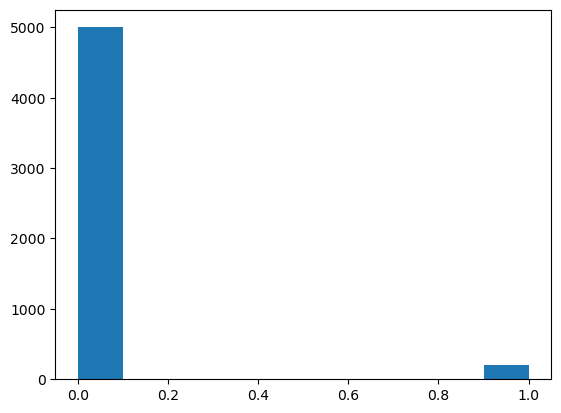

In [65]:
plt.hist(y_train)

In [62]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train_scaled,y_train)

LogisticRegression()

**lg.predict(X_test_scaled):** Generates predictions for the test dataset using the trained model.

**confusion_matrix(y_test, predictions):** Displays a matrix that shows the counts of true positives, true negatives, false positives, and false negatives, helping to assess model accuracy.

**classification_report(y_test, predictions):** Provides a detailed report including precision, recall, F1-score, and support for each class.

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score
predictions = lg.predict(X_test_scaled)


print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Accuracy is",round(accuracy_score(y_test,predictions)*100), "%")

[[1251    0]
 [  49    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1251
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1300
   macro avg       0.48      0.50      0.49      1300
weighted avg       0.93      0.96      0.94      1300

Accuracy is 96 %


**Confusion Matrix:**

True Negatives (TN): 1251 - Correctly identified as "Legit" (class 0).
False Positives (FP): 0 - No "Legit" instances were incorrectly classified as "Fraud."
False Negatives (FN): 49 - Instances of "Fraud" (class 1) incorrectly classified as "Legit."
True Positives (TP): 0 - The model failed to identify any actual "Fraud" cases.

**Classification Report:**

Class 0 (Legit):
Precision: 0.96 - When the model predicted "Legit," it was correct 96% of the time.
Recall: 1.00 - It successfully identified all "Legit" cases.
F1-Score: 0.98 - Strong performance for identifying "Legit."

Class 1 (Fraud):
Precision: 0.00 - The model did not correctly identify any "Fraud" cases.
Recall: 0.00 - Failed to detect "Fraud" instances.
F1-Score: 0.00 - Poor performance for "Fraud".

**Overall Metrics:**

Accuracy: 96% - The high accuracy is misleading because the model is biased towards predicting "Legit" due to class imbalance.

### **Data is highly imbalanced using SMOTE to fix**

In [72]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
oversample = SMOTE(random_state=42)
X_train_scaled,y_train=oversample.fit_resample(X_train_scaled,y_train)



(array([5000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

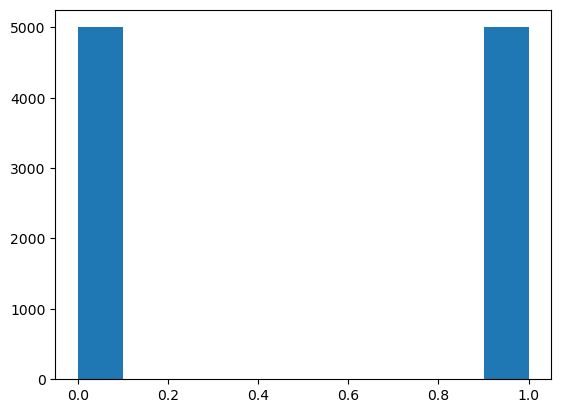

In [73]:
plt.hist(y_train)

In [74]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=42)
log.fit(X_train_scaled,y_train)

LogisticRegression(random_state=42)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
y_pred=log.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy is",round(accuracy_score(y_test,y_pred)*100), "%")

[[883 368]
 [ 18  31]]
              precision    recall  f1-score   support

           0       0.98      0.71      0.82      1251
           1       0.08      0.63      0.14        49

    accuracy                           0.70      1300
   macro avg       0.53      0.67      0.48      1300
weighted avg       0.95      0.70      0.79      1300

Accuracy is 70 %


**Confusion Matrix**

True Negatives (TN): 883 - Correctly identified as "Legit" (class 0).
False Positives (FP): 368 - Instances of "Legit" incorrectly classified as "Fraud" (class 1).
False Negatives (FN): 18 - Instances of "Fraud" incorrectly classified as "Legit" (class 0).
True Positives (TP): 31 - Correctly identified as "Fraud" (class 1).

**Classification Report**

Class 0 (Legit):

Precision: 0.98 - When the model predicts "Legit," it is correct 98% of the time.
Recall: 0.71 - The model successfully identified 71% of the actual "Legit" cases.
F1-Score: 0.82 - A strong balance between precision and recall for class 0.

Class 1 (Fraud):

Precision: 0.08 - Only 8% of the instances predicted as "Fraud" were correct, indicating that many predicted "Fraud" cases are actually "Legit".
Recall: 0.63 - The model successfully identified 63% of the actual "Fraud" cases, which is an improvement from the previous results.
F1-Score: 0.14 - The F1-score remains low, reflecting difficulties in correctly identifying "Fraud" instances.

**Overall Metrics**

Accuracy: 70% - The model is correct 70% of the time, but the high accuracy is largely due to the number of correct predictions for the majority class ("Legit").

Macro Avg:

Precision: 0.53 - The average precision across both classes is moderate.
Recall: 0.67 - The average recall indicates better performance than before, particularly for the "Fraud" class.
F1-Score: 0.48 - The overall F1-score suggests room for improvement.

Weighted Avg:

Precision: 0.95 - The weighted precision is high, influenced by the majority class.
Recall: 0.70 - The weighted recall reflects reasonable performance but indicates ongoing issues with detecting "Fraud".
F1-Score: 0.79 - A better performance for the majority class but still not strong for "Fraud".